<a href="https://colab.research.google.com/github/pythonkvs/seminars/blob/main/Web_XML_API_11_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web-разработка на Python

1. Практикум по программированию на языке Python  
Роман Ищенко (roman.ischenko@gmail.com), МФТИ  
https://github.com/MelLain/mipt-python/blob/spring-2021/lectures/09-web.ipynb  
    
    MDN Web Docs, mozilla  
    https://developer.mozilla.org/ru/docs/Web/HTTP/Overview

2. Using Python to Access Web Data, Python for Everybody  
Charles R. Severance (www.dr-chuck.com), University of Michigan  
https://www.py4e.com  
https://www.py4e.com/materials  
https://www.py4e.com/lectures3/ru/  



In [ ]:
import warnings
warnings.filterwarnings('ignore')

## HTTP

HTTP (HyperText Transfer Protocol) — это протокол, позволяющий получать различные ресурсы. Изначально, как следует из названия — для документов, но сейчас уже для передачи произвольных данных.

#### Преимущества
- Прост и человекочитаем
- Расширяем
- Не имеет состояния (каждый запрос — в отрыве от остальных)

#### Расширения
- Кеш
- Ослабление ограничений источника
- Аутентификация
- Прокси и туннелирование
- Сессии

## Состав запроса

- HTTP-метод: GET, POST, OPTIONS и т. д., определяющий операцию, которую клиент хочет выполнить
- Путь к ресурсу
- Версия HTTP-протокола
- Заголовки  (опционально)
- Тело (для некоторых методов, таких как POST)


```
GET / HTTP/1.1
Host: ya.ru
User-Agent: Python script
Accept: */*

```

## Состав ответа

- Версия HTTP-протокола
- HTTP код состояния, сообщающий об успешности запроса или причине неудачи
- Сообщение состояния -- краткое описание кода состояния
- HTTP заголовки
- Опционально: тело, содержащее пересылаемый ресурс


```
HTTP/1.1 200 Ok
Cache-Control: no-cache,no-store,max-age=0,must-revalidate
Content-Length: 59978
Content-Type: text/html; charset=UTF-8
Date: Thu, 29 Apr 2021 03:48:39 GMT
Set-Cookie: yp=1622260119.ygu.1; Expires=Sun, 27-Apr-2031 03:48:39 GMT; Domain=.ya.ru; Path=/
```

## Типы запросов

- GET
- HEAD
- POST
- PUT
- DELETE
- CONNECT
- OPTIONS
- TRACE
- PATCH

## Заголовки

- Authentication
- Caching
- Client hints
- Conditionals
- Connection management
- Cookies
- Message body information
- Request context
- Response context
- Security
- WebSockets


## Коды

- Информационные (100 - 199)
- Успешные (200 - 299)
- Перенаправления (300 - 399)
- Клиентские ошибки (400 - 499)
- Серверные ошибки (500 - 599)

```
200 OK
302 Found
400 Bad Request
401 Unauthorized
404 Not Found
500 Internal Server Error
503 Service Unavailable
```

## HTTPS

- HTTPS не является отдельным протоколом передачи данных, а представляет собой расширение протокола HTTP с надстройкой шифрования
- передаваемые по протоколу HTTP данные не защищены, HTTPS обеспечивает конфиденциальность информации путем ее шифрования
- HTTP использует порт 80, HTTPS — порт 443

Принцип работы:
- С помощью ассиметричного шифрования устанавливается ключ соединения
- Всё дальнейшее общение шифруется сессионным ключом

## Python Web-clients



In [ ]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if (len(data) < 1):
        break
    print(data.decode(),end='')
mysock.close()

HTTP/1.1 200 OK
Date: Wed, 10 Nov 2021 14:03:37 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


Стандартная библиотека `urllib`

In [ ]:
import json
import urllib.request
ur = urllib.request.urlopen('https://postman-echo.com/get?foo=bar')
print(ur.code)
content = json.loads(ur.read())
print(json.dumps(content, indent=4, sort_keys=True))

200
{
    "args": {
        "foo": "bar"
    },
    "headers": {
        "accept-encoding": "identity",
        "host": "postman-echo.com",
        "user-agent": "Python-urllib/3.7",
        "x-amzn-trace-id": "Root=1-618bd139-07ae23a6142f67392f87ec91",
        "x-forwarded-port": "443",
        "x-forwarded-proto": "https"
    },
    "url": "https://postman-echo.com/get?foo=bar"
}


In [ ]:
import json
from urllib import request, parse
data = parse.urlencode({ 'foo': 'bar' }).encode()
req = request.Request('https://postman-echo.com/post', method="POST", data=data)
ur = request.urlopen(req)
print(ur.headers)
content = json.loads(ur.read())
print(json.dumps(content, indent=4, sort_keys=True))

Date: Thu, 11 Nov 2021 09:29:22 GMT
Content-Type: application/json; charset=utf-8
Content-Length: 398
Connection: close
ETag: W/"18e-uuykjW+hiapG03eSxyHSXaUcjYo"
Vary: Accept-Encoding
set-cookie: sails.sid=s%3AOJ9Z0Hka5RF8cft5n_Xs2D3LrSm-7CRP.831EcPkPmuqzOfC6oBrTTPA%2BryQTS2ayueUHlXjtPXU; Path=/; HttpOnly


{
    "args": {},
    "data": "",
    "files": {},
    "form": {
        "foo": "bar"
    },
    "headers": {
        "accept-encoding": "identity",
        "content-length": "7",
        "content-type": "application/x-www-form-urlencoded",
        "host": "postman-echo.com",
        "user-agent": "Python-urllib/3.7",
        "x-amzn-trace-id": "Root=1-618ce272-635bb352311663d723805df2",
        "x-forwarded-port": "443",
        "x-forwarded-proto": "https"
    },
    "json": {
        "foo": "bar"
    },
    "url": "https://postman-echo.com/post"
}


Библиотека `requests`

Установка:
`pipenv install requests`

Запрос GET

In [ ]:
import requests

r = requests.get('https://postman-echo.com/get', params={'foo': 'bar'}, headers={'user-agent': 'Python Script'})
print(r.status_code)
content = json.loads(r.content)
print(json.dumps(content, indent=4, sort_keys=True))


200
{
    "args": {
        "foo": "bar"
    },
    "headers": {
        "accept": "*/*",
        "accept-encoding": "gzip, deflate",
        "host": "postman-echo.com",
        "user-agent": "Python Script",
        "x-amzn-trace-id": "Root=1-618bd139-4a6159e154bd302855334b44",
        "x-forwarded-port": "443",
        "x-forwarded-proto": "https"
    },
    "url": "https://postman-echo.com/get?foo=bar"
}


Запрос POST

In [ ]:
import requests

r = requests.post('https://postman-echo.com/post', json={'foo': 'bar'},headers = {'user-agent': 'Python Script'})
print(r.status_code)
print(r.request.headers)
content = json.loads(r.content)
print(json.dumps(content, indent=4, sort_keys=True))

200
{'user-agent': 'Python Script', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '14', 'Content-Type': 'application/json'}
{
    "args": {},
    "data": {
        "foo": "bar"
    },
    "files": {},
    "form": {},
    "headers": {
        "accept": "*/*",
        "accept-encoding": "gzip, deflate",
        "content-length": "14",
        "content-type": "application/json",
        "host": "postman-echo.com",
        "user-agent": "Python Script",
        "x-amzn-trace-id": "Root=1-618bd139-1c746b1c4600588260e271be",
        "x-forwarded-port": "443",
        "x-forwarded-proto": "https"
    },
    "json": {
        "foo": "bar"
    },
    "url": "https://postman-echo.com/post"
}


## Python web-server libs

Flask — микрофреймворк для создания вебсайтов на языке Python.

https://flask-russian-docs.readthedocs.io/ru/latest/quickstart.html

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
   return 'Hello, World!'
   
if __name__ == '__main__':
   app.run()

In [ ]:
import requests
r = requests.get('http://127.0.0.1:5000/')
print(r.headers)
print(r.content)

Если нужно добавить HTTP-методы

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def hello_world():
    print(request.method)
    return {'data': 'Hello, World!'}
   
if __name__ == '__main__':
   app.run()

В пути можно использовать переменные

Синтаксис: `<converter:variable_name>`

Доступные converters:
- string
- int
- float
- path
- uuid


In [ ]:
@app.route('/hello/<string:name>')
def hello_name(name):
    return f'Hello {name}!'

In [ ]:
import requests
r = requests.get('http://127.0.0.1:5000/hello/John')
print(r.content)

Flask используется для разработки и отладки.

Для промышленной эксплуатации необходимо использование WSGI (Web Server Gateway Interface) сервера:
* WSGI-сервера были разработаны, чтобы обрабатывать множество запросов одновременно. А фреймворки (в том числе flask) не предназначены для обработки тысяч запросов и не дают решения того, как наилучшим образом маршрутизировать запросы с веб-сервера.
* с WSGI  не нужно беспокоиться о том, как ваша конкретная инфраструктура использует стандарт WSGI.
* WSGI дает Вам гибкость в изменении компонентов веб-стека без изменения приложения, которое работает с WSGI.

Если не планируется большой нагрузки, для `flask` это может быть `waitress`.

Установка: `pipenv install waitress`

Использование:

In [ ]:
from waitress import serve
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
   return 'Hello, World!'
   
if __name__ == '__main__':
    # Вместо запуска flask запускаем waitress.serve
    # app.run()
    serve(app, host='0.0.0.0', port='5000')

Либо запускаем из командной строки: `waitress-serve --port 5000 '<имя модуля>:<перемнная приложения>'`

Если наш файл называется `server.py`, то наш пример можно запустить командой: `waitress-serve --port 5000 'server:app'`

Все запросы к веб-сервису выполняются последовательно. Можно использовать асинхронность и многопоточность, но мы знаем, что она сработает не во всех случаях.

Эту проблему решают масштабированием через внешние WSGI-серверы. Для Python их существует некоторое количество: Bjoern, uWSGI, mod_wsgi, Meinheld, CherryPy, Gunicorn.

Gunicorn — это WSGI-сервер, созданный для использования в UNIX-системах. Название — сокращенная и комбинированная версия слов «Green Unicorn». Gunicorn был перенесен из проекта «Unicorn» из языка Ruby. Он относительно быстрый, не требует много ресурсов, легко запускается и работает с широким спектром веб-фреймворков.

<img src="https://cdn-images-1.medium.com/max/1200/1*nFxyDwJ2DEH1G5PMKPMj1g.png"/>

Запуск для нашего примера: `gunicorn --bind 0.0.0.0:5000 --workers 4 'server:app'`

https://dvmn.org/encyclopedia/web-server/deploy-wsgi-gunicorn-django-flask/

# HTML-парсинг (или веб-скрейпинг)

## Что такое веб-скрейпинг?

* Программа или скрипт, притворяясь браузером, извлекает и анализирует информацию с веб-страниц, а затем отправляется по ссылкам на следующие страницы
* Поисковый робот, обрабатывающий веб-страницы, называется «веб-паук» или «веб-краулер»

## Зачем нужен веб-скрейпинг?

* Извлечь данные, особенно из соц.сетей: кто на кого ссылается?
* Получить обратно свои данные из системы, не имеющей возможности экспорта данных
* Мониторить сайт на предмет новой информации
* Создать базу данных для поискового робота

## Скрейпинг веб-страниц

* Все еще существуют разногласия по поводу использования веб-скрейпинга, и некоторые сайты особенно непримиримы в этом отношении
* Не разрешается повторная публикация информации, защищенной авторским правом
* Не допускается нарушение условий пользования сервисом

## Простой способ — Beautiful Soup

* можно выполнять поиск по строкам сложным путем
* или использовать бесплатную библиотеку BeautifulSoup с сайта www.crummy.com

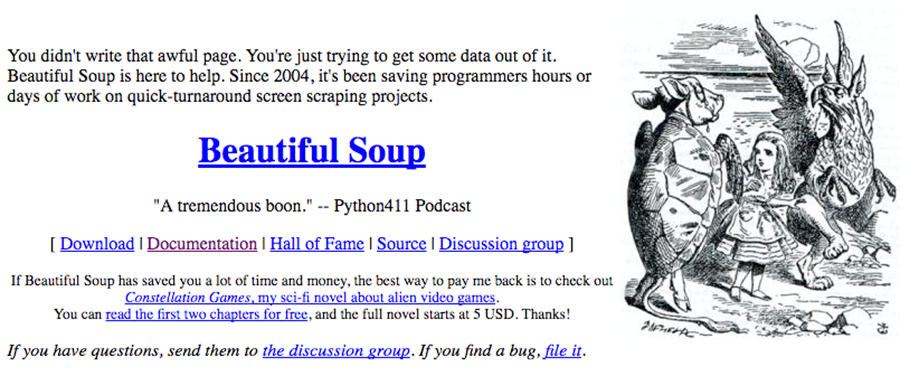

https://www.crummy.com/software/BeautifulSoup/

## Установка BeautifulSoup

https://pypi.python.org/pypi/beautifulsoup4

In [ ]:
# urllinks.py
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url = input('Enter - ')
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

# Получить все теги типа «ссылка»
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))

Enter - http://www.dr-chuck.com/page1.htm
http://www.dr-chuck.com/page2.htm


```bash
python urllinks.py 
Enter - http://www.dr-chuck.com/page1.htm
http://www.dr-chuck.com/page2.htm
```

# Данные в Веб

* Так как технология HTTP (запрос/ответ) понятна и хорошо поддерживается, возник естественный переход к обмену данными между программами, использующими эти протоколы
* Необходимо было придумать согласованный способ представления данных, передаваемых между приложениями и по сети
* Обычно используются два формата: XML и JSON

## Передача данных по «сети»

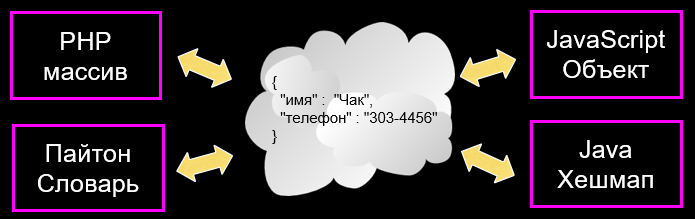

## Соглашения по формату передачи

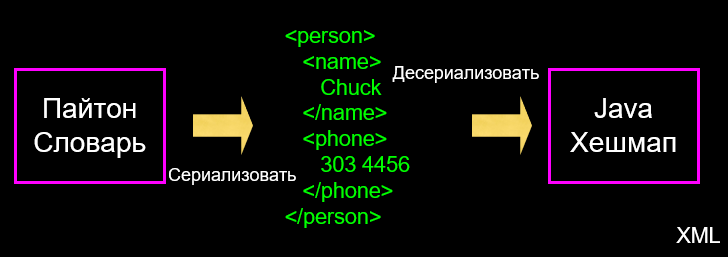

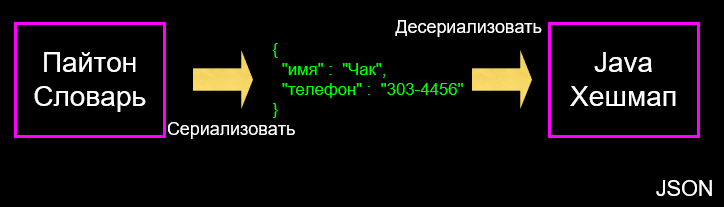

# XML

XML (e**X**tensible** M**arkup **L**anguage) — расширяемый язык разметки (разметка данных для отправки по сети)



https://ru.wikipedia.org/wiki/XML

## XML-элементы (ноды)

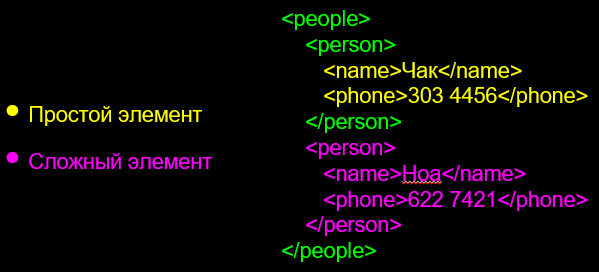

## Расширяемый язык разметки (XML)

* Основная цель — помочь информационным системам обмениваться структурированными данными
* Появился как подмножество Стандартного обобщенного языка разметки (англ. SGML) и разработан так, чтобы быть понятным человеку

## Основы XML

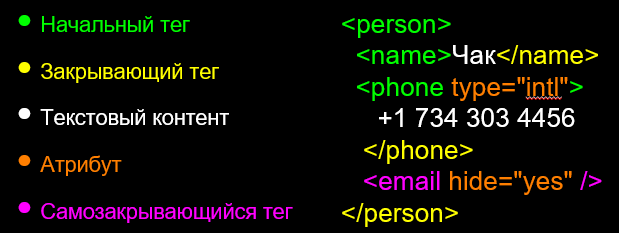

## Пробелы

Концы строк не имеют значения. Пробелы в текстовых элементах обычно отбрасываются. 
Мы делаем отступ только для удобства чтения

```xml
<person>
  <name>Чак</name>
  <phone type="intl">
     +1 734 303 4456
   </phone>
   <email hide="yes" />
</person>
```

```xml
<person>
  <name>Чак</name>
  <phone type="intl">+1 734 303 4456</phone>
  <email hide="yes" />
</person>
```

## XML-терминология

* Теги обозначают начало и конец элемента
* Атрибуты — пары Ключевое слово/Значение в открывающем теге XML
* Сериализовать / Десериализовать — преобразовать данные программы в общий формат, который может храниться и/или передаваться между системами независимо от языка программирования

https://ru.wikipedia.org/wiki/Сериализация

## XML в виде дерева

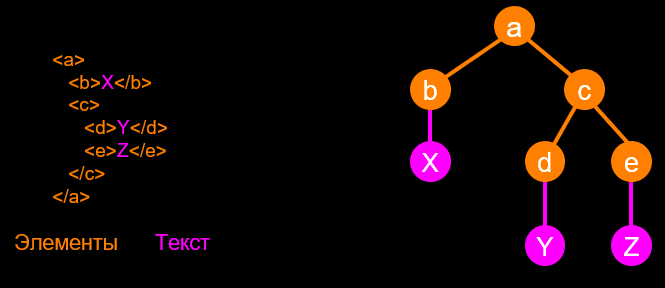

## Текст и атрибуты в XML

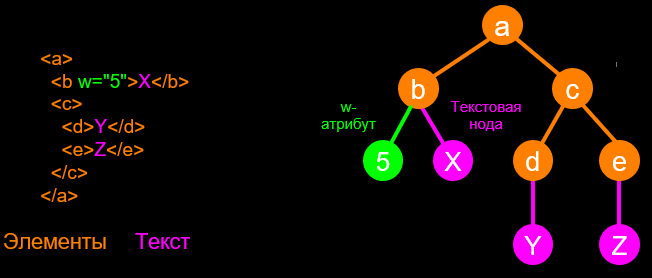

## XML в виде путей

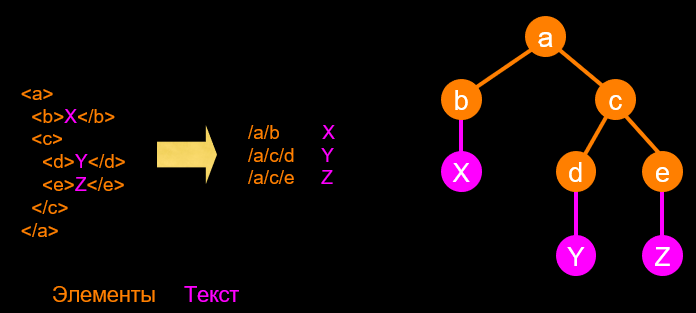

## XML-Schema

Описание правил, которым должен подчиняться документ

http://en.wikipedia.org/wiki/Xml_schema  
http://en.wikibooks.org/wiki/XML_Schema

* Язык описания структуры XML-документа
* Налагает ограничения на структуру и содержимое документа
* Часто используется для установления «контракта» между системами: «Моя система будет принимать XML, который соответствует этой конкретной Схеме»
* Если конкретный фрагмент XML соответствует спецификации Схемы, он считается  «подтвержденным»


# Валидация XML

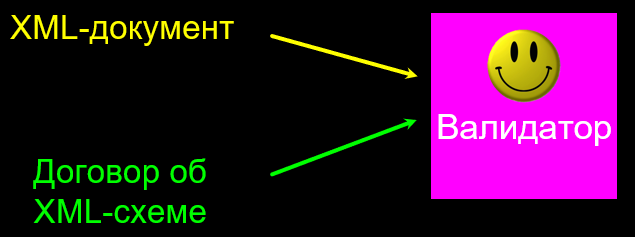

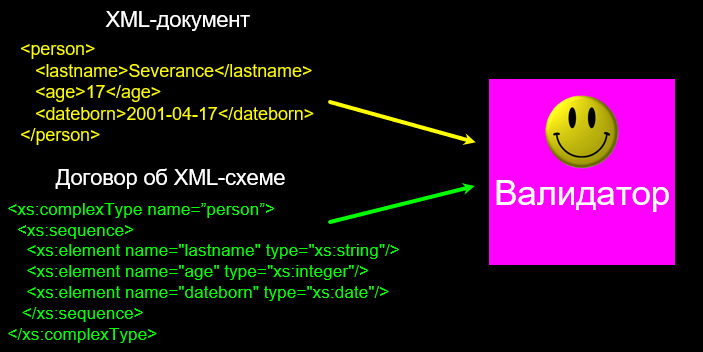

## Множество языков XML-схемы

* Определение типа документа (англ. DTD)  
https://ru.wikipedia.org/wiki/DTD
* Стандартный обобщенный язык разметки (ISO 8879:1986 SGML)  
https://ru.wikipedia.org/wiki/SGML
* XML-Schema (W3C) - ( .XSD - расширение файла)  
https://ru.wikipedia.org/wiki/XML_Schema_(W3C)

## XSD XML-Schema (W3C)

* Мы сосредоточимся на версии Консорциума Всемирной паутины (англ.W3C)
* Ее часто называют «W3C-схема», так как «Схема» считается универсальной
* Часто ее называют XSD, так как файл имеет расширение .xsd

https://ru.wikipedia.org/wiki/XML_Schema_(W3C)

## Структура XSD

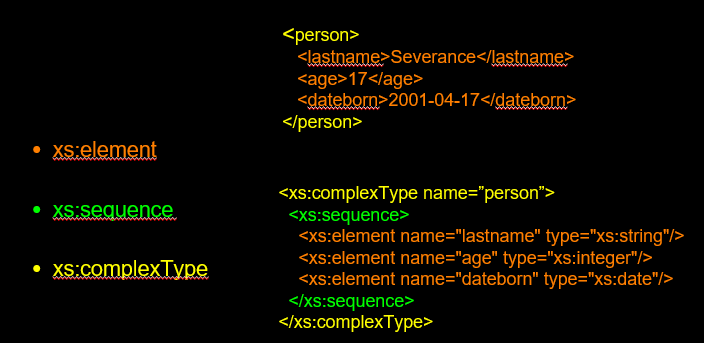

## XSD-ограничения

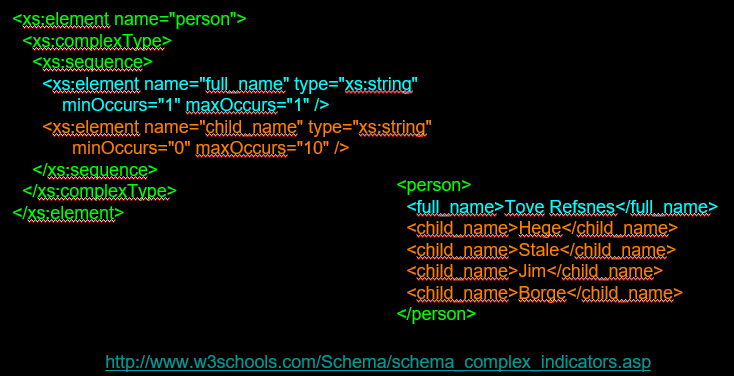

## Типы данных XSD

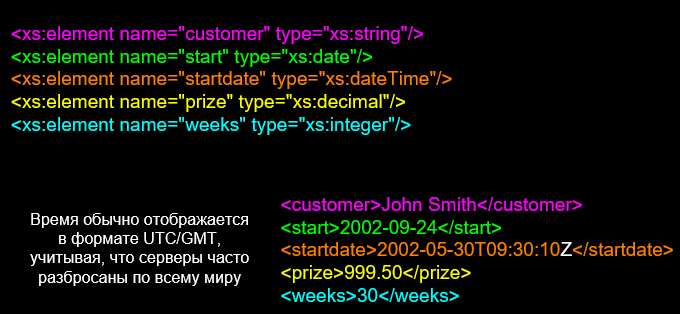

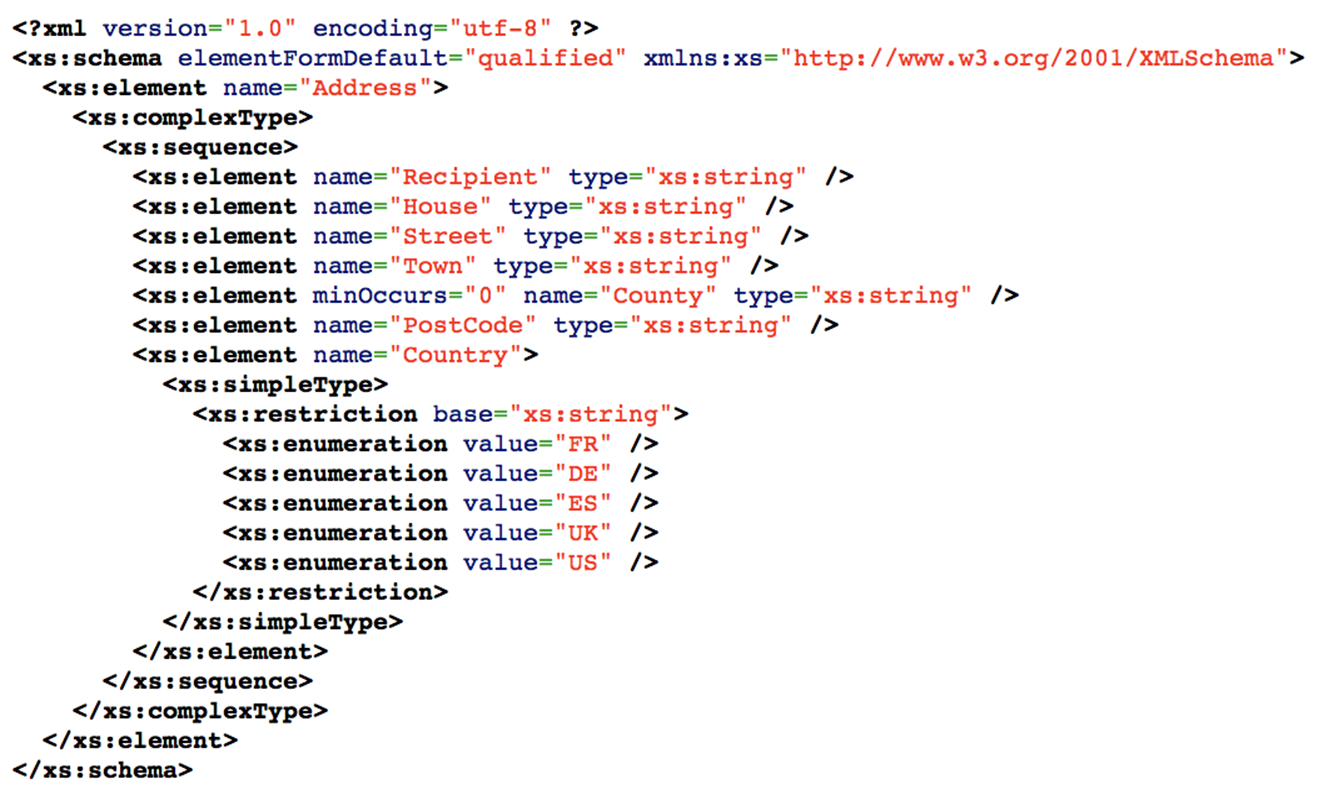

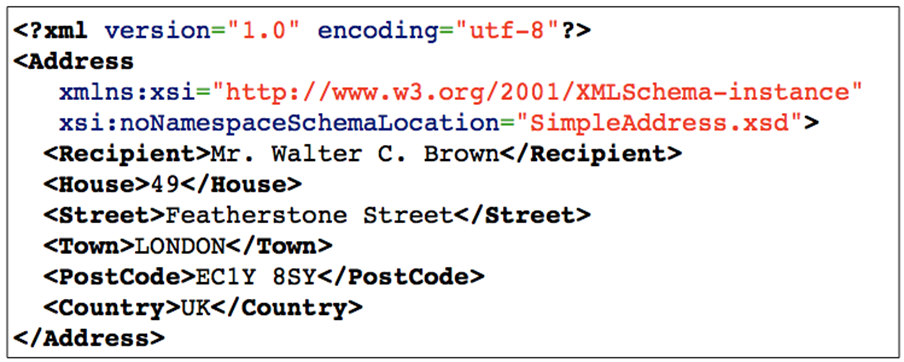

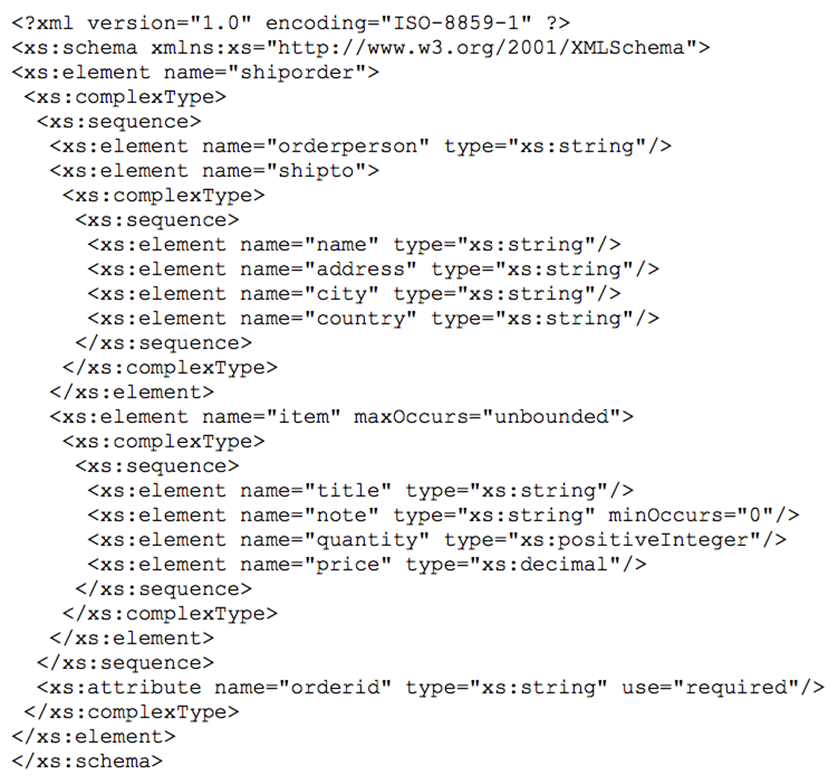

http://www.w3schools.com/Schema/schema_example.asp

In [ ]:
# xml1.py
import xml.etree.ElementTree as ET
data = '''<person>
  <name>Chuck</name>
  <phone type="intl">
     +1 734 303 4456
   </phone>
   <email hide="yes"/>
</person>'''

tree = ET.fromstring(data)
print('Name:',tree.find('name').text)
print('Attr:',tree.find('email').get('hide'))

Name: Chuck
Attr: yes


In [ ]:
# xml2.py
import xml.etree.ElementTree as ET
data = '''<stuff>
    <users>
        <user x="2">
            <id>001</id>
            <name>Chuck</name>
        </user>
        <user x="7">
            <id>009</id>
            <name>Brent</name>
        </user>
    </users>
</stuff>'''

stuff = ET.fromstring(data)
lst = stuff.findall('users/user')
print('User count:', len(lst))
for item in lst:
    print('Name', item.find('name').text)
    print('Id', item.find('id').text)
    print('Attribute', item.get("x"))

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


## Текстовый формат обмена данными (JSON)

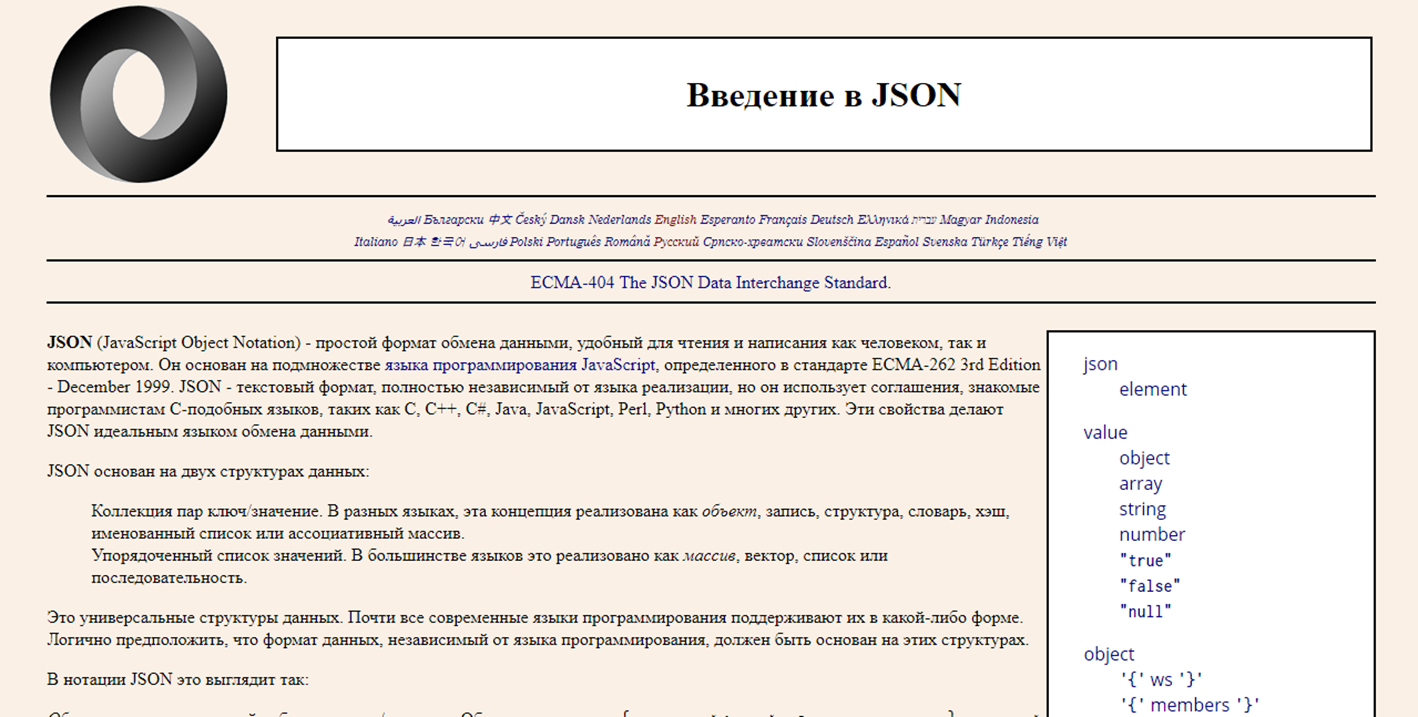

In [ ]:
# json1.py
import json
data = '''{
  "name" : "Chuck",
  "phone" : {
    "type" : "intl",
    "number" : "+1 734 303 4456"
   },
   "email" : {
     "hide" : "yes"
   }
}'''

info = json.loads(data)
print('Name:',info["name"])
print('Hide:',info["email"]["hide"])

Name: Chuck
Hide: yes


In [ ]:
# json2.py
import json
data = '''[
  { "id" : "001",
    "x" : "2",
    "name" : "Chuck"
  } ,
  { "id" : "009",
    "x" : "7",
    "name" : "Chuck"
  }
]'''

info = json.loads(data)

print('User count:', len(info))
for item in info:
    print('Name', item['name'])
    print('Id', item['id'])
    print('Attribute', item['x'])

User count: 2
Name Chuck
Id 001
Attribute 2
Name Chuck
Id 009
Attribute 7


## Сервис-ориентированный подход

https://ru.wikipedia.org/wiki/Сервис-ориентированная_архитектура

* Большинство веб-приложений используют сервисы
* Сервисы публикуют «правила», которым приложения должны следовать, чтобы использовать данный сервис (API)



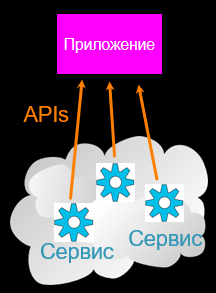

# Веб-сервисы

https://ru.wikipedia.org/wiki/Веб-служба

## Программный интерфейс приложения (API)

API определяет интерфейс и поведение объектов в этом интерфейсе, но при этом позволяет абстрагироваться от того, как именно эта функциональность будет реализована.
Программное обеспечение, которое предоставляет функциональность, описываемую в API, называется «реализация» API. Обычно API определяется в терминах языка программирования, используемого при создании приложения


https://ru.wikipedia.org/wiki/API

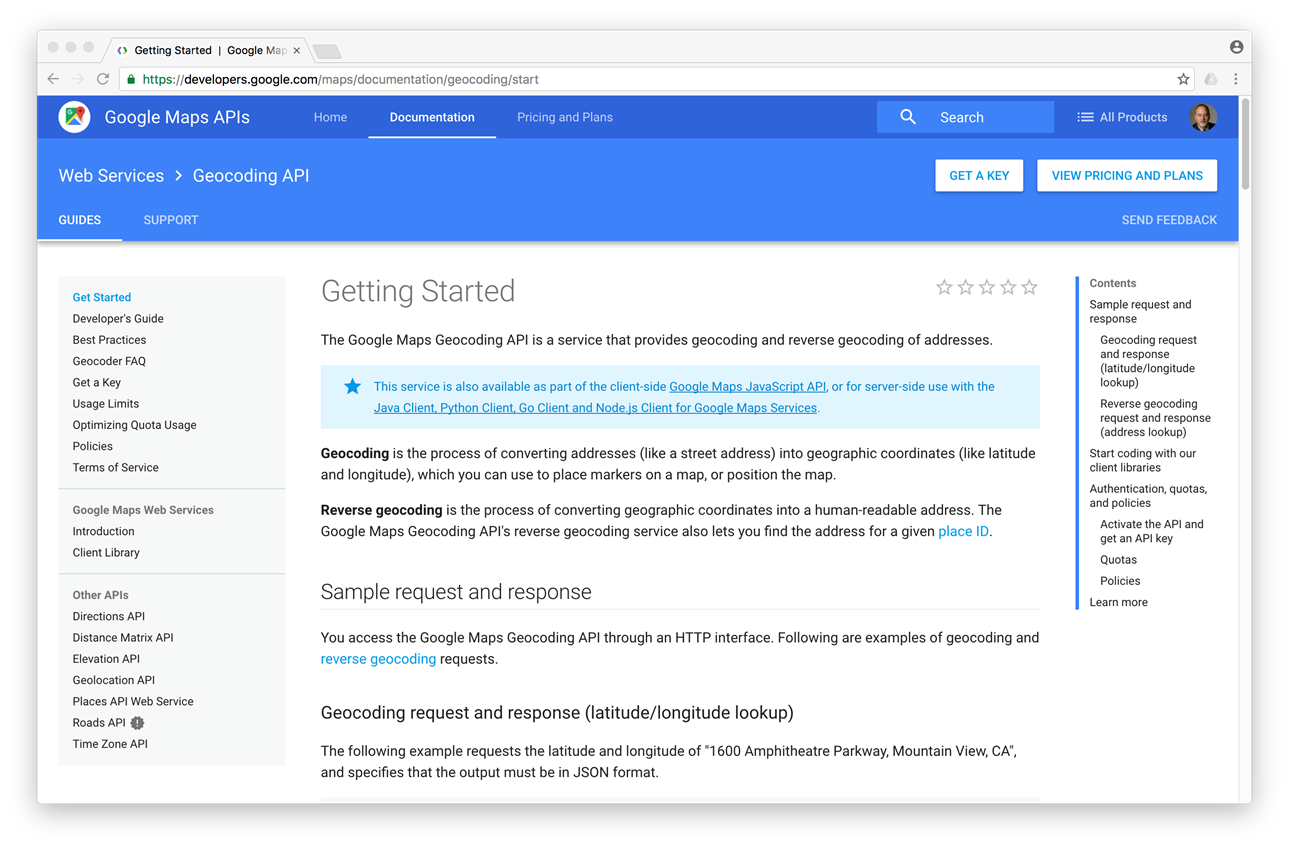

https://developers.google.com/maps/documentation/geocoding/

In [ ]:
{
    "status": "OK",
     "results": [
        {
            "geometry": {
                "location_type": "APPROXIMATE",
                 "location": {
                    "lat": 42.2808256,
                     "lng": -83.7430378
                }
            },
            "address_components": [
                {
                    "long_name": "Ann Arbor",
                     "types": [
                        "locality",
                         "political"
                    ],
                    "short_name": "Ann Arbor"
                }
             ],
             "formatted_address": "Ann Arbor, MI, USA",
             "types": [
                "locality",
                "political"
            ]
        }
    ]
}

In [ ]:
# geojson.py
import urllib.request, urllib.parse, urllib.error
import json

serviceurl = 'http://maps.googleapis.com/maps/api/geocode/json?'

while True:
    address = input('Введите местонахождение: ')
    if len(address) < 1: break

    url = serviceurl + urllib.parse.urlencode({'address': address})

    print('Извлечение с ', url)
    uh = urllib.request.urlopen(url)
    data = uh.read().decode()
    print('Извлечено', len(data), 'символов')

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Ошибка извлечения ====')
        print(data)
        continue

    lat = js["results"][0]["geometry"]["location"]["lat"]
    lng = js["results"][0]["geometry"]["location"]["lng"]
    print('Широта', lat, 'Долгота', lng)
    location = js['results'][0]['formatted_address']
    print(location)

```
Введите местонахождение: Ann Arbor, MI
Извлечение с http://maps.googleapis.com/...
Извлечено 1669 символов
Широта 42.2808256 Долгота -83.7430378
Ann Arbor, MI, USA
Введите местонахождение:
```

## API-безопасность и ограничение на количество обращений

* Вычислительные ресурсы для запуска этих API являются платными
* Обычно данные, предоставляемые этими API, имеют ценность
* Поставщики данных могут ограничивать количество запросов в день, запрашивать API-ключ, а также взимать плату за использование
* Время от времени правила могут меняться

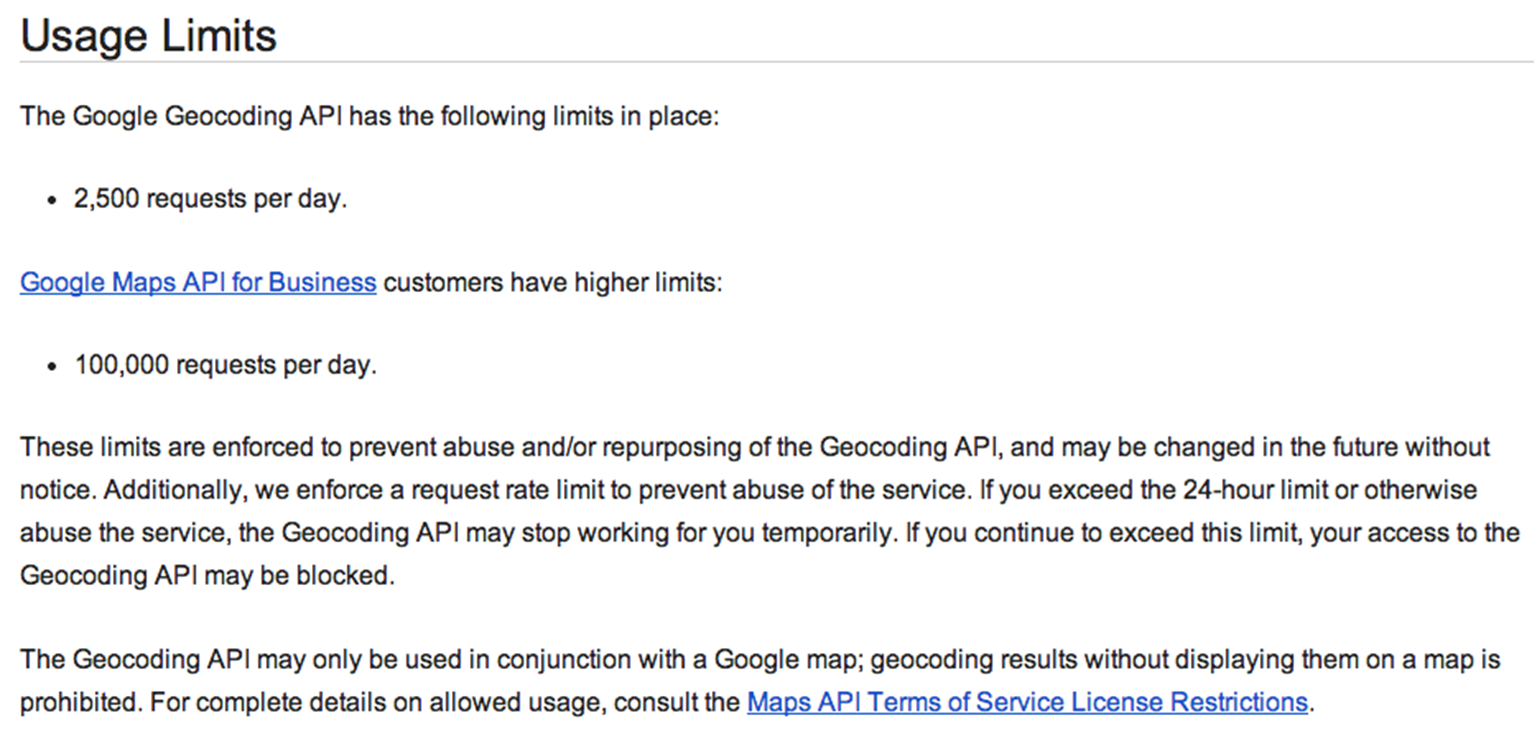

## SOAP и REST архитектура

|          #           |                                 SOAP                                 |                                REST                                 |
|----------------------|----------------------------------------------------------------------|---------------------------------------------------------------------|
| Расшифровка обозначения              | Simple Object Access Protocol («простой протокол доступа к объектам»)                                        | Representational State Transfer («передача репрезентативного состояния»)                                     |
| Как спроектирован               | Стандартизированный протокол с заранее определенными правилами.              | Архитектурный стиль с четкими указаниями и рекомендациями.      |
| Подход             | Функционально-управляемый (данные доступны в виде сервисов, например: «getUser»)        | На основе данных (данные доступны в виде ресурсов, например, «user»).             |
| Состояние         | По умолчанию без сохранения состояния, но можно сделать API SOAP с отслеживанием состояния. | Без сохранения состояния (без сеансов на стороне сервера).                                |
| Кеширование              | Вызовы API нельзя кэшировать.                                          | Вызовы API можно кэшировать.                                            |
| Безопасность             | WS-Security с поддержкой SSL. Встроенное соответствие ACID.              | Поддерживает HTTPS и SSL.                                             |
| Производительность          | Требуется большая пропускная способность и вычислительная мощность.                         | Требует меньше ресурсов.                                           |
| Формат сообщения       | Только XML.                                                            | Обычный текст, HTML, XML, JSON, YAML и другие.                      |
| Протокол(ы) передачи | HTTP, SMTP, UDP и другие.                                         | Только HTTP.                                                           |
| Рекомендуется для      | Корпоративные приложения, приложения с высоким уровнем безопасности, распределенная среда,        | Публичные API для веб-сервисов, мобильных сервисов, социальных сетей.     |
|                      | финансовые услуги, платежные шлюзы, телекоммуникационные услуги.    |                                                                     |
| Достоинства           | Высокая безопасность, стандартизация, расширяемость.                          | Масштабируемость, лучшая производительность, удобство для браузера, гибкость. |
| Недостатки        | Более низкая производительность, большая сложность, меньшая гибкость.               | Минимальная безопасность, не подходит для распределенных сред.        |



SOAP - https://ru.wikipedia.org/wiki/SOAP  
REST - https://ru.wikipedia.org/wiki/REST

## Резюме

* Сервис-ориентированная архитектура позволяет разбить приложение на независимые компоненты и использовать их в сети
* Программный интерфейс приложения (API) — договор для взаимодействия
* Веб-сервисы предоставляют инфраструктуру для приложений, взаимодействующих (API) по сети: SOAP и REST — два стиля взаимодействия веб-сервисов
* XML и JSON — форматы сериализации